In [1]:
import shutil, random, os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import pywt
import math

In [2]:
widths = np.arange(1,101)

In [3]:
dirpath='/home/sultan/EEG/CP/CP_Extracted_CSV_Source_Dk_data/'

/home/sultan/EEG/CP/CP_Extracted_CSV_Source_Dk_data/S1/Trig_3/
/home/sultan/EEG/CP/CP_Extracted_CSV_Source_Dk_data/S2/Trig_3/
/home/sultan/EEG/CP/CP_Extracted_CSV_Source_Dk_data/S3/Trig_3/
/home/sultan/EEG/CP/CP_Extracted_CSV_Source_Dk_data/S4/Trig_3/
/home/sultan/EEG/CP/CP_Extracted_CSV_Source_Dk_data/S5/Trig_3/
/home/sultan/EEG/CP/CP_Extracted_CSV_Source_Dk_data/S6/Trig_3/
/home/sultan/EEG/CP/CP_Extracted_CSV_Source_Dk_data/S7/Trig_3/
/home/sultan/EEG/CP/CP_Extracted_CSV_Source_Dk_data/S8/Trig_3/
/home/sultan/EEG/CP/CP_Extracted_CSV_Source_Dk_data/S9/Trig_3/
/home/sultan/EEG/CP/CP_Extracted_CSV_Source_Dk_data/S10/Trig_3/
/home/sultan/EEG/CP/CP_Extracted_CSV_Source_Dk_data/S11/Trig_3/
/home/sultan/EEG/CP/CP_Extracted_CSV_Source_Dk_data/S12/Trig_3/
/home/sultan/EEG/CP/CP_Extracted_CSV_Source_Dk_data/S13/Trig_3/
/home/sultan/EEG/CP/CP_Extracted_CSV_Source_Dk_data/S14/Trig_3/
/home/sultan/EEG/CP/CP_Extracted_CSV_Source_Dk_data/S15/Trig_3/
/home/sultan/EEG/CP/CP_Extracted_CSV_Source_Dk_da

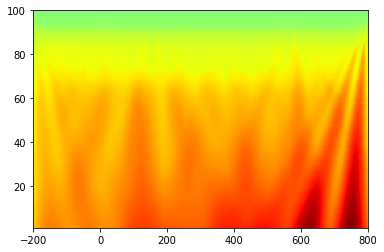

In [4]:
a=0;count=0;evk_ind40=evk_ind66=np.zeros((100, 500))
sub=range(1,51)
Ev=[3];#event number
for k in range(0,len(sub)):
      if k!=15:
        for j in range(0,len(Ev)):
            pnh=dirpath+'S'+str(sub[k])+'/'+'Trig_'+str(Ev[j])+'/'
            dpin=pnh
            print dpin
            from os import walk
            from os.path import isfile, join
            f = []
            for (dpin, dirnames, filenames) in walk(dpin):
                f.extend(join(dpin, x) for x in filenames if x.endswith(".csv"))
                break
            for i in range(0,len(f)):
                dd=pd.read_csv(f[i])
                df1=dd
                tmp = df1.copy()
                tmp = tmp.drop(columns=['cc1'] )
                ## base line correction
                orgd=np.asmatrix(tmp)
                blm=np.mean(tmp.iloc[:,0:100],axis=1)
                bsm=np.asmatrix(blm).T
                ablc=orgd-bsm
                df22=np.asarray(ablc)
                df22
                cwtmatr40, freqs = pywt.cwt(df22[40], widths, 'morl')
                evk_ind40=evk_ind40+abs(cwtmatr40)
                cwtmatr66, freqs = pywt.cwt(df22[66], widths, 'morl')
                evk_ind66=evk_ind66+abs(cwtmatr66)
                dd1=dd.drop(dd.columns[0],axis=1)
                a=a+dd1
                count=count+1
dftk15=pd.DataFrame(a/count)
cwtmatr_evk40, freqs = pywt.cwt(dftk15.iloc[40,:], widths, 'morl')
ind_res40=(evk_ind40/count)-cwtmatr_evk40
cwtmatr_evk66, freqs = pywt.cwt(dftk15.iloc[66,:], widths, 'morl')
ind_res66=(evk_ind66/count)-cwtmatr_evk66
plt.imshow(cwtmatr_evk40, extent=[-200, 800, 1, 100], cmap='jet', aspect='auto',vmax=abs(cwtmatr_evk40).max(), vmin=-abs(cwtmatr_evk40).max()) # doctest:
plt.imshow(ind_res40, extent=[-200, 800, 1, 100], cmap='jet', aspect='auto',vmax=abs(ind_res40).max(), vmin=-abs(ind_res40).max()) # doctest:
plt.show()

In [5]:
# cwtmatr.shape
# cwtmatr_evk, freqs = pywt.cwt(dftk15.iloc[66,:], widths, 'morl')
# im=plt.imshow(cwtmatr_evk, extent=[-200, 800, 1, 100], cmap='jet', aspect='auto',vmax=abs(cwtmatr_evk).max(), vmin=-abs(cwtmatr_evk).max()) # doctest:

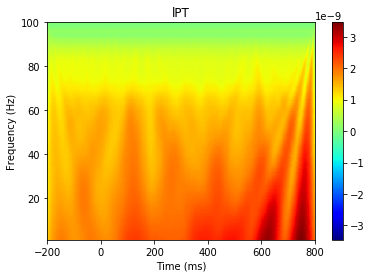

In [6]:
# plt.imshow(cwtmatr_evk40, extent=[-200, 800, 1, 100], cmap='jet', aspect='auto',vmax=abs(cwtmatr_evk40).max(), vmin=-abs(cwtmatr_evk40).max()) # doctest:
im=plt.imshow(ind_res40, extent=[-200, 800, 1, 100], cmap='jet', aspect='auto',vmax=abs(ind_res40).max(), vmin=-abs(ind_res40).max()) # doctest:
plt.title('lPT')
plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
# plt.clim(-3e-10, 3e-10)
plt.colorbar(im)
plt.show() # doctest: +SKIP
plt.show()

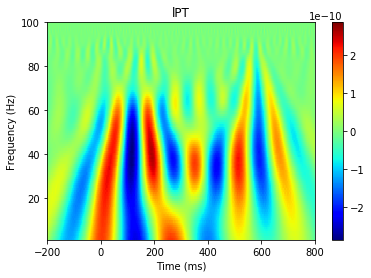

In [7]:
im=plt.imshow(cwtmatr_evk40, extent=[-200, 800, 1, 100], cmap='jet', aspect='auto',vmax=abs(cwtmatr_evk40).max(), vmin=-abs(cwtmatr_evk40).max()) # doctest:
# plt.imshow(ind_res40, extent=[-200, 800, 1, 100], cmap='jet', aspect='auto',vmax=abs(ind_res40).max(), vmin=-abs(ind_res40).max()) # doctest:
plt.title('lPT')
plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
# plt.clim(-3e-10, 3e-10)
plt.colorbar(im)
plt.show() # doctest: +SKIP
plt.show()

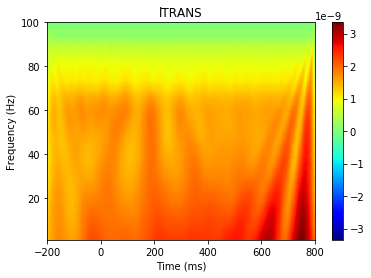

In [8]:
# plt.imshow(cwtmatr_evk40, extent=[-200, 800, 1, 100], cmap='jet', aspect='auto',vmax=abs(cwtmatr_evk40).max(), vmin=-abs(cwtmatr_evk40).max()) # doctest:
im=plt.imshow(ind_res66, extent=[-200, 800, 1, 100], cmap='jet', aspect='auto',vmax=abs(ind_res66).max(), vmin=-abs(ind_res66).max()) # doctest:
plt.title('lTRANS')
plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
# plt.clim(-3e-10, 3e-10)
plt.colorbar(im)
plt.show() # doctest: +SKIP
plt.show()

### Tk3 legend

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


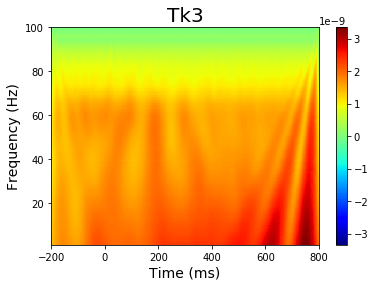

In [9]:
axis_font = {'fontname':'Arial', 'size':'14'}
# plt.imshow(cwtmatr_evk40, extent=[-200, 800, 1, 100], cmap='jet', aspect='auto',vmax=abs(cwtmatr_evk40).max(), vmin=-abs(cwtmatr_evk40).max()) # doctest:
im=plt.imshow(ind_res66, extent=[-200, 800, 1, 100], cmap='jet', aspect='auto',vmax=abs(ind_res66).max(), vmin=-abs(ind_res66).max()) # doctest:
plt.title('Tk3',fontsize=20)
plt.xlabel('Time (ms)',**axis_font)
plt.ylabel('Frequency (Hz)',**axis_font)
# plt.clim(-3e-10, 3e-10)
plt.colorbar(im)
plt.show() # doctest: +SKIP

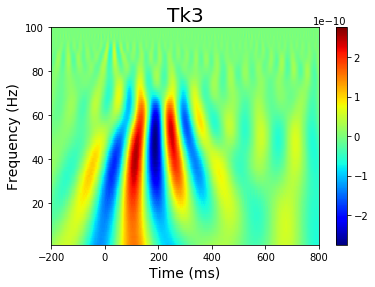

In [10]:
axis_font = {'fontname':'Arial', 'size':'14'}
im=plt.imshow(cwtmatr_evk66, extent=[-200, 800, 1, 100], cmap='jet', aspect='auto',vmax=abs(cwtmatr_evk66).max(), vmin=-abs(cwtmatr_evk66).max()) # doctest:
# plt.imshow(ind_res40, extent=[-200, 800, 1, 100], cmap='jet', aspect='auto',vmax=abs(ind_res40).max(), vmin=-abs(ind_res40).max()) # doctest:
plt.title('Tk3',fontsize=20)
plt.xlabel('Time (ms)',**axis_font)
plt.ylabel('Frequency (Hz)',**axis_font)
# plt.clim(-3e-10, 3e-10)
plt.colorbar(im)
plt.show() # doctest: +SKIP
plt.show()

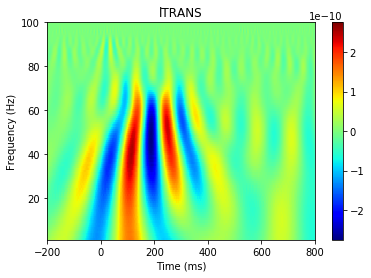

In [11]:
im=plt.imshow(cwtmatr_evk66, extent=[-200, 800, 1, 100], cmap='jet', aspect='auto',vmax=abs(cwtmatr_evk66).max(), vmin=-abs(cwtmatr_evk66).max()) # doctest:
# plt.imshow(ind_res40, extent=[-200, 800, 1, 100], cmap='jet', aspect='auto',vmax=abs(ind_res40).max(), vmin=-abs(ind_res40).max()) # doctest:
plt.title('lTRANS')
plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
# plt.clim(-3e-10, 3e-10)
plt.colorbar(im)
plt.show() # doctest: +SKIP
plt.show()

In [12]:
# len(a.iloc[44,:].values)
# dnhc*300==a

In [13]:
# plt.plot(df22)
# plt.show()

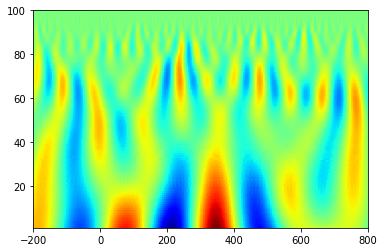

In [14]:
widths = np.arange(1,100)
cwtmatr, freqs = pywt.cwt(df22[66], widths, 'morl')
im=plt.imshow(cwtmatr, extent=[-200, 800, 1, 100], cmap='jet', aspect='auto',vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max()) # doctest:
# plt.title('lTRANS')
# plt.xlabel('Time (ms)')
# plt.ylabel('Frequency (Hz)')
# # plt.clim(-3e-10, 3e-10)
# plt.colorbar(im)
# plt.show() # doctest: +SKIP

In [15]:
cwtmatr.shape

(99, 500)

In [16]:
ind_res66

array([[3.00855084e-11, 8.09588496e-11, 3.11393778e-11, ...,
        1.84909108e-11, 3.29392713e-11, 9.00768266e-11],
       [2.25944619e-11, 1.05006936e-10, 1.15594579e-10, ...,
        5.45235915e-11, 1.29066758e-10, 1.37228715e-10],
       [8.18229368e-11, 2.17247742e-10, 1.08061756e-10, ...,
        1.64967687e-10, 1.02218819e-10, 2.62280096e-10],
       ...,
       [1.35818319e-09, 1.39749555e-09, 1.41216852e-09, ...,
        2.08384263e-09, 1.97654607e-09, 1.93347097e-09],
       [1.36435907e-09, 1.40405639e-09, 1.41960056e-09, ...,
        2.10405186e-09, 1.99783165e-09, 1.95508575e-09],
       [1.36877237e-09, 1.40822210e-09, 1.42532342e-09, ...,
        2.12515581e-09, 2.01670993e-09, 1.97333393e-09]])

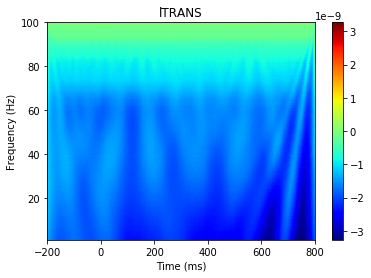

In [17]:
ind_res666=cwtmatr_evk40-(evk_ind66/count)
# plt.imshow(cwtmatr_evk40, extent=[-200, 800, 1, 100], cmap='jet', aspect='auto',vmax=abs(cwtmatr_evk40).max(), vmin=-abs(cwtmatr_evk40).max()) # doctest:
im=plt.imshow(ind_res666, extent=[-200, 800, 1, 100], cmap='jet', aspect='auto',vmax=abs(ind_res666).max(), vmin=-abs(ind_res666).max()) # doctest:
plt.title('lTRANS')
plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
# plt.clim(-3e-10, 3e-10)
plt.colorbar(im)
plt.show() # doctest: +SKIP
plt.show()